In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 62.13167424573086
Iteration 2, RMSE: 106.07322095989203
Iteration 3, RMSE: 108.55553221752602
Iteration 4, RMSE: 77.9173196843736
Iteration 5, RMSE: 75.90953346186966
Iteration 6, RMSE: 84.11998565807777
Iteration 7, RMSE: 110.87231717623848
Iteration 8, RMSE: 102.92730064308869
Iteration 9, RMSE: 125.62836257787548
Iteration 10, RMSE: 89.05200028186307
Iteration 11, RMSE: 89.9706058274706
Iteration 12, RMSE: 99.24533350456056
Iteration 13, RMSE: 97.30587943019086
Iteration 14, RMSE: 92.15876069423538
Iteration 15, RMSE: 86.86679109030189
Iteration 16, RMSE: 81.26084360959035
Iteration 17, RMSE: 85.29278410093715
Iteration 18, RMSE: 85.24250311491409
Convergence reached at iteration 18.


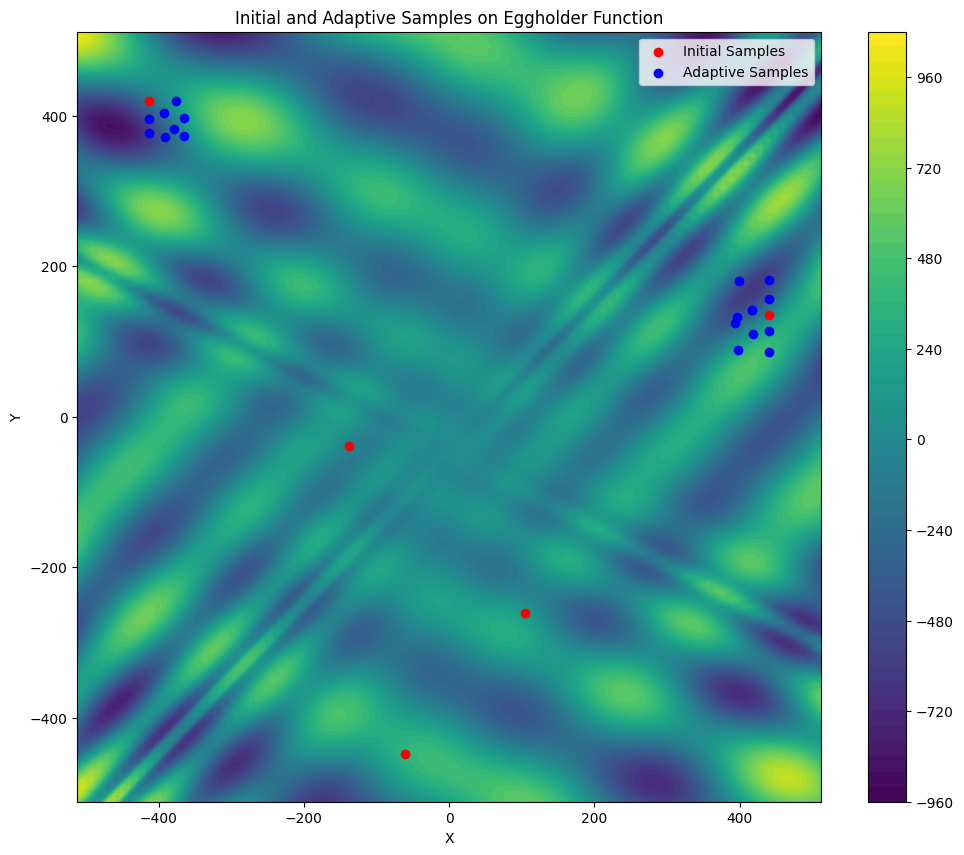

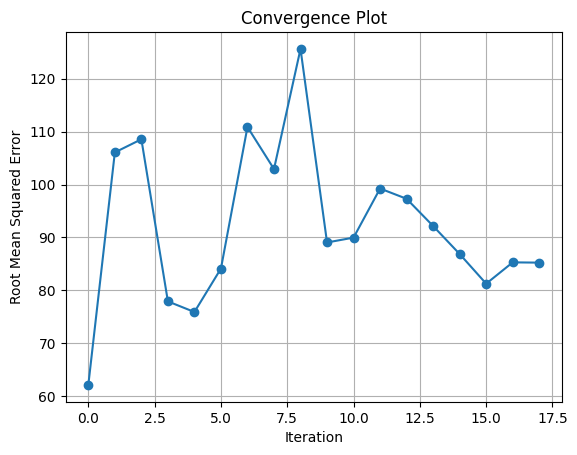

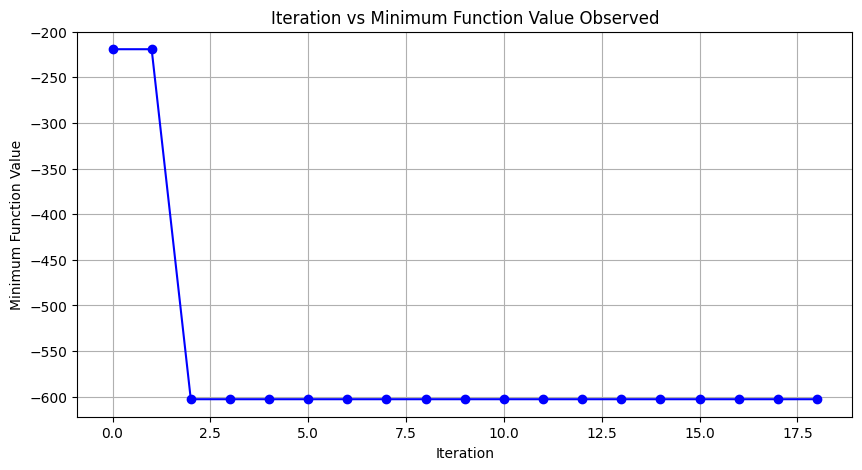

Best observed function value after active learning: -602.8077282620021
            X1          X2
0  -413.362438  419.578755
1   439.596959  135.142409
2   104.807909 -261.210592
3  -137.311677  -38.872180
4   -61.111778 -448.584971
5  -364.793878  372.768136
6  -413.362438  377.233947
7  -365.314316  397.547126
8  -391.596753  371.552090
9  -378.791647  382.217376
10  398.457909  179.958179
11  397.750554   89.071035
12  439.596959  181.258087
13  395.530819  132.307233
14  439.596959   85.810960
15  418.207806  109.682474
16  439.596959  114.580635
17  439.596959  155.917569
18  393.195733  124.248330
19 -392.743459  403.689999
20 -413.362438  396.437367
21 -375.313390  419.578755
22  416.812384  142.530012
23  416.812384  142.530012


In [4]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh(x_range=(-512, 512), y_range=(-512, 512), num_points=100, function=ex_func.eggholder)

# Generate initial samples
lhs_sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = lhs_sampler.sample(num_samples=5, x_min=-512, y_min=-512, x_max=512, y_max=512)
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
adaptive_sampler = samplers.AdaptiveSampling(ex_func.eggholder)
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, adaptive_sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning()

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z)
